# Исследование надёжности заёмщиков: предобработка и первичный анализ данных

## Описание проекта:

В данном проекте проводится предобработка и первичный анализ данных кредитного отдела банка, для того чтобы получить базовое представление о том, влияет ли семейное положение и количество детей заемщика на факт своевременного погашения кредита. Исследование основано на статистике о платежеспособности клиентов. Результаты анализа будут использоваться при дальнейшем построении модели кредитного скоринга.

## Главные выводы:

* Клиенты без детей реже становятся должниками по сравнению с теми, у кого есть дети. С увеличением количества детей растет риск несвоевременного погашения задолженности;


* Клиенты, находящиеся в официальном браке, либо находившиеся в нем ранее, реже становятся должниками;


* Заемщики с самым низким уровнем дохода имеют относительно низкий уровень просрочки. Заемщики со средними доходами имеют наивысший риск просрочки. Состоятельные заемщики демонстрируют риск, чуть ниже группы с самыми низкими доходами;


* Относительно безопасными можно условно считать займы, связанные с недвижимостью (просрочка в 7.2% случаев). Чуть более рискованный кредит на свадьбу (8%). Самые рискованные кредиты - на образование (9.2%) и автомобиль (9.3%).

## Содержание проекта: <a name="introduction"></a>

#### 1. [Обзор данных](#paragraph1)

#### 2. [Предобработка данных](#paragraph2)

* 2.1 [Обработка пропусков и аномалий](#subparagraph2_1)
* 2.2 [Замена типов данных](#subparagraph2_2)
* 2.3 [Обработка дубликатов](#subparagraph2_3)
* 2.4 [Лемматизация](#subparagraph2_4)
* 2.5 [Категоризация данных](#subparagraph2_5)

#### 3. [Исследовательский анализ данных](#paragraph3)

* 3.1 [Есть ли зависимость между наличием детей и возвратом кредита в срок?](#subparagraph3_1)
* 3.2 [Есть ли зависимость между семейным положением и возвратом кредита в срок?](#subparagraph3_2)
* 3.3 [Есть ли зависимость между уровнем дохода и возвратом кредита в срок?](#subparagraph3_3)
* 3.4 [Как разные цели кредита влияют на его возврат в срок?](#subparagraph3_4)

#### 4. [Общий вывод](#paragraph4)

## 1. Обзор данных <a name="paragraph1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pymystem3
from pymystem3 import Mystem

Defaulting to user installation because normal site-packages is not writeable


In [2]:
plt.rcParams['figure.figsize'] = (12,6)

In [3]:
data = pd.read_csv('/datasets/data.csv')

In [4]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод:** Набор данных состоит из 12 столбцов и 21525 строк.
В столбцах `days_employed` и `total_income` присутствуют несуществующие значения. 
Также очевидно, что датасет содержит артефакты: отрицательные значения в трудовом стаже, дубликаты в столбце `education` (разный регистр) и дубликаты в столбце `purpose` (синонимичные формулировки). Кроме того, некоторые столбцы нуждаются в изменении типа данных (`days_employed` и `total_income` на целочисленный).
Категориальные переменные: `education`, `family_status`, `gender`, `income_type`, `debt`, `purpose`.
Количественные переменные: `children`, `days_employed`, `dob_years`, `total_income`.

[Вернуться к оглавлению](#introduction)

## 2. Предобработка данных <a name="paragraph2"></a>

### 2.1 Обработка пропусков и аномалий <a name="subparagraph2_1"></a>

In [6]:
data.isna().agg(['sum', 'mean']).transpose()

,sum,mean
children,0.0,0.000000
days_employed,2174.0,0.100999
dob_years,0.0,0.000000
education,0.0,0.000000
education_id,0.0,0.000000
family_status,0.0,0.000000
family_status_id,0.0,0.000000
gender,0.0,0.000000
income_type,0.0,0.000000
debt,0.0,0.000000


**Вывод:** Было обнаружено по 2174 пропущенных значения в столбцах `days_employed` и `total_income`. Данные строки составляют около 10% датасета, а значит, скорее всего, приведут к существенным искажениям выборки в случае удаления или заполнения пропусков. Попробуем проанализировать строки с пропусками - для этого создадим датафрейм только с такими строками.

In [7]:
na_df = data[data.isnull().any(axis=1)]

In [8]:
na_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
children            2174 non-null int64
days_employed       0 non-null float64
dob_years           2174 non-null int64
education           2174 non-null object
education_id        2174 non-null int64
family_status       2174 non-null object
family_status_id    2174 non-null int64
gender              2174 non-null object
income_type         2174 non-null object
debt                2174 non-null int64
total_income        0 non-null float64
purpose             2174 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


In [9]:
na_df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Очевидно, что люди, которые не указывают свой стаж, также не указывают информацию о доходе. Далее посмотрим отрицательные значения.

In [10]:
children_negative = data.loc[data.loc[:, 'children'] < 0]['children'].count()
days_employed_negative = data.loc[data.loc[:, 'days_employed'] < 0]['days_employed'].count()
dob_years_negative = data.loc[data.loc[:, 'dob_years'] < 0]['dob_years'].count()           
education_id_negative = data.loc[data.loc[:, 'education_id'] < 0]['education_id'].count()                   
family_status_id_negative = data.loc[data.loc[:, 'family_status_id'] < 0]['family_status_id'].count()              
debt_negative = data.loc[data.loc[:, 'debt'] < 0]['debt'].count()  
total_income_negative = data.loc[data.loc[:, 'total_income'] < 0]['total_income'].count()

print(children_negative)
print(days_employed_negative)
print(dob_years_negative)
print(education_id_negative)
print(family_status_id_negative)
print(debt_negative)
print(total_income_negative)

47
15906
0
0
0
0
0


Отрицательные значения были найдены в столбцах `children` и `days_employed`.
Обратим внимание на столбец `days_employed`. 

In [11]:
negative_emp_rate = data[data['days_employed'] < 0]['days_employed'].count() / data.shape[0]
print(negative_emp_rate)

0.7389547038327526


Видно, что количество строк с отрицательным стажем составляет 15906 из 21525, то есть доля таких значений составляет около 74%. Это слишком высокая доля некорректных данных для использования в анализе. Помимо столбца с трудовым стажем, отрицательные значения были также найдены в столбце с количеством детей (47 строк). Количество строк с отрицательными значениями в столбце `children` незначительно и имеет смысл исправить отрицательные значения.

In [12]:
data['children'] = abs(data['children'])

Посмотрим на адекватность данных по стажу, предполагая, что минусы возникли вследствие технической ошибки. Для этого воспользуемся методом `abs()` и оценим абсолютные значения стажа.

In [13]:
data['days_employed_abs'] = abs(data['days_employed'])

In [14]:
data.groupby('income_type')['days_employed_abs'].agg(['median', 'count'])

,median,count
income_type,,
безработный,366413.652744,2
в декрете,3296.759962,1
госслужащий,2689.368353,1312
компаньон,1547.382223,4577
пенсионер,365213.306266,3443
предприниматель,520.848083,1
сотрудник,1574.202821,10014
студент,578.751554,1


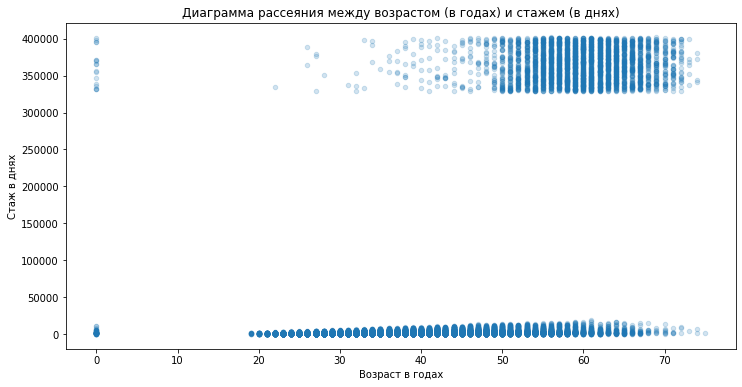

In [15]:
data.plot(kind='scatter',x='dob_years',y='days_employed_abs',alpha=0.2)
plt.title('Диаграмма рассеяния между возрастом (в годах) и стажем (в днях)')
plt.xlabel('Возраст в годах')
plt.ylabel('Стаж в днях')
plt.show()

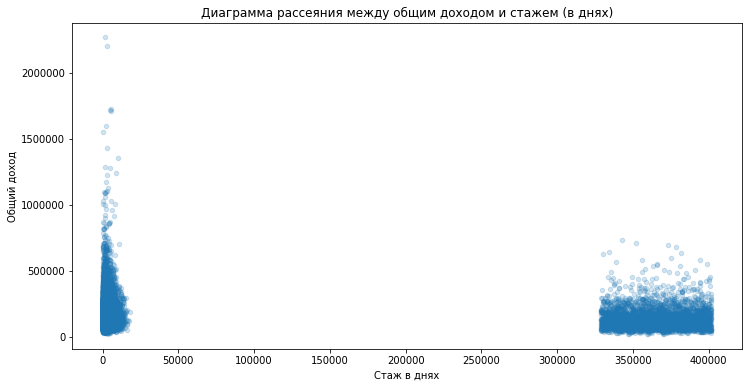

In [16]:
data.plot(kind='scatter',x='days_employed_abs',y='total_income',alpha=0.2)
plt.title('Диаграмма рассеяния между общим доходом и стажем (в днях)')
plt.xlabel('Стаж в днях')
plt.ylabel('Общий доход')
plt.show()

У безработных и пенсионеров встретились аномально высокие значения стажа. Стоит отметить что, доход этих двух групп не должен зависеть от стажа. Но и в целом связь между стажем и доходом а также между возрастом и стажем нельзя назвать однозначной. На диаграммах приведенных выше можно увидеть, что данные были сильно искажены (возможно домножены на поправочный коэффициент). Поэтому, вследствие наличия пропусков, крайне большого количества отрицательных значений, а также аномально высоких значений, было принято решение исключить столбец стажа из дальнейшего анализа и вместо него использовать уровень дохода как более надежную переменную.

In [17]:
data = data.drop(['days_employed', 'days_employed_abs'],axis=1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 11 columns):
children            21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 1.8+ MB


In [19]:
data.groupby('income_type')['total_income'].median()

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

Заполним пропуски дохода в каждой группе соответствующей медианой для сохранения репрезентативности.

In [20]:
for i in data['income_type'].unique():
    data.loc[(data['income_type'] == i) & (data['total_income'].isnull()), 'total_income'] \
    = data.loc[data['income_type'] == i]['total_income'].median()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 11 columns):
children            21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 1.8+ MB


Все пропущенные значения были успешно заполнены медианными значениями для каждой группы с целью минимизации искажений. Теперь рассмотрим нестандартные строковые варианты пропущенных значений, которые не были распознаны как null. Для этого просмотрим оставшиеся уникальные значения в других столбцах методом `value_counts()`.

In [22]:
data['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

In [23]:
data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [24]:
data['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
покупка своего жилья                      620
строительство недвижимости                620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

In [25]:
data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

Один человек не указал пол, что было записано как строка 'XNA'. Данный пропуск невозможно заполнить, поэтому строка удаляется из дальнейшего анализа.

In [26]:
data = data[data['gender'] != 'XNA']
data['gender'].value_counts()

F    14236
M     7288
Name: gender, dtype: int64

**Вывод:** На этапе обработки пропусков были идентифицированы по 2174 пропуска в столбцах с трудовым стажем и доходом, что составило около 10% строк в датасете. Столбец со стажем был исключен из рассмотрения как некорректный. Для сохранения репрезентативности было принято решение сгруппировать выборку по типам занятости и заполнить пропуски дохода соответствующими медианными значениями. Также была удалена 1 строка с пропущенным значением пола. 47 строк с отрицательным значением в столбце `children` были взяты по модулю.

### 2.2 Замена типов данных <a name="subparagraph2_2"></a>

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 11 columns):
children            21524 non-null int64
dob_years           21524 non-null int64
education           21524 non-null object
education_id        21524 non-null int64
family_status       21524 non-null object
family_status_id    21524 non-null int64
gender              21524 non-null object
income_type         21524 non-null object
debt                21524 non-null int64
total_income        21524 non-null float64
purpose             21524 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 2.0+ MB


Типы переменных были идентифицированы корректно, однако для удобства анализа имеет смысл привести доход (в рублях) к целочисленным значениям с помощью метода `astype()`

In [28]:
data['total_income'] = data['total_income'].astype('int')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 11 columns):
children            21524 non-null int64
dob_years           21524 non-null int64
education           21524 non-null object
education_id        21524 non-null int64
family_status       21524 non-null object
family_status_id    21524 non-null int64
gender              21524 non-null object
income_type         21524 non-null object
debt                21524 non-null int64
total_income        21524 non-null int64
purpose             21524 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


**Вывод:** В столбце с доходом, тип данных был изменен с вещественного на целочисленный.

### 2.3 Обработка дубликатов <a name="subparagraph2_3"></a>

Приведем строки в датафрейме к нижнему регистру для нахождения дубликатов с помощью метода `str.lower()`

In [30]:
data['education'] = data['education'].str.lower()
data['family_status'] = data['family_status'].str.lower()
data['purpose'] = data['purpose'].str.lower()

Оценим количество полных дубликатов методом `duplicated()`

In [31]:
data.duplicated().sum()

71

Найден 71 дубликат. Удалим их методом `drop_duplicates()`

In [32]:
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

**Вывод:** Были устранены 71 полных дубликатов. Предположительно, они могли возникнуть вследствие технической ошибки копирования или экспорта данных.

### 2.4 Лемматизация <a name="subparagraph2_4"></a>

Выделим основные леммы в столбце цели кредита. Для этого воспользуемся PyMystem3.

In [33]:
m = Mystem()

In [34]:
data['purpose_lemmatized'] = data['purpose'].apply(m.lemmatize)

In [35]:
data.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemmatized
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]"
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]"
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]"
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]"
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]"


**Вывод:** Цели кредита были пролемматизированы, и леммы выделены в новый столбец `purpose_lemmatized`. Всего встречаются 4 типа целей: свадьба, недвижимость, автомобиль, образование. Далее проведем категоризацию всех выданных кредитов согласно этим 4 типам.

### 2.5 Категоризация данных <a name="subparagraph2_5"></a>

In [36]:
def purpose(row):
    if 'свадьба' in row:
        return 'свадьба'
    if 'жилье' in row:
        return 'недвижимость'
    if 'недвижимость' in row:
        return 'недвижимость'
    if 'автомобиль' in row:
        return 'автомобиль'
    if 'образование' in row:
        return 'образование'

In [37]:
data['loan_category'] = data['purpose_lemmatized'].apply(purpose)

In [38]:
data['loan_category'].value_counts()

недвижимость    10810
автомобиль       4306
образование      4013
свадьба          2324
Name: loan_category, dtype: int64

In [39]:
def children(row):
    if row == 0:
        return 'нет детей'
    if row > 0:
        return 'есть дети'

In [40]:
data['children_category'] = data['children'].apply(children)

In [41]:
data['children_category'].value_counts()

нет детей    14090
есть дети     7363
Name: children_category, dtype: int64

In [42]:
def marriage(row):
    if 'женат / замужем' in row:
        return 'был / находится в браке'
    if 'гражданский брак' in row:
        return 'не был / не находится в браке'
    if 'Не женат / не замужем' in row:
        return 'не был / не находится в браке'
    if 'в разводе' in row:
        return 'был / находится в браке'
    if 'вдовец / вдова' in row:
        return 'был / находится в браке'

In [43]:
data['marriage_category'] = data['family_status'].apply(marriage)

In [44]:
data['marriage_category'].value_counts()

был / находится в браке          14493
не был / не находится в браке     4150
Name: marriage_category, dtype: int64

In [45]:
def marriage_present(row):
    if 'женат / замужем' in row:
        return 'сейчас находится в браке/сожительстве'
    if 'гражданский брак' in row:
        return 'сейчас находится в браке/сожительстве'
    if 'Не женат / не замужем' in row:
        return 'сейчас не находится в браке/сожительстве'
    if 'в разводе' in row:
        return 'сейчас не находится в браке/сожительстве'
    if 'вдовец / вдова' in row:
        return 'сейчас не находится в браке/сожительстве'

In [46]:
data['marriage_present_category'] = data['family_status'].apply(marriage_present)

In [47]:
data['marriage_present_category'].value_counts()

сейчас находится в браке/сожительстве       16489
сейчас не находится в браке/сожительстве     2154
Name: marriage_present_category, dtype: int64

**Вывод:** Была проведена категоризация всех кредитов на 4 основных типа. Установлено, что самыми популярными оказались кредиты на недвижимость (10810 клиентов), затем идут автокредиты (4306 клиентов) и кредиты на образование (4013 клиентов). Наименее востребованными в данной выборке оказались свадебные кредиты (2324 клиента). Далее все клиенты были разделены на 2 категории - есть дети / нет детей. Заемщиков без детей оказалось почти в два раза больше, чем тех, у кого они есть (14090 против 7363). Также заемщики были разделены на тех, кто когда-либо находился в официальном браке (14493 клиента), и тех, кто никогда не был (4150 клиентов). Также предложена альтернативная классификация семейного положения - деление на тех, кто состоит в официальном или "гражданском" браке, и тех кто не состоит.

[Вернуться к оглавлению](#introduction)

## 3. Исследовательский анализ данных <a name="paragraph3"></a>

### 3.1 Есть ли зависимость между наличием детей и возвратом кредита в срок? <a name="subparagraph3_1"></a>

In [48]:
data.groupby('children')['debt'].agg(['mean','count'])

,mean,count
children,,
0,0.075444,14090
1,0.091658,4855
2,0.094542,2052
3,0.081818,330
4,0.097561,41
5,0.000000,9
20,0.105263,76


In [49]:
data.groupby('children_category')['debt'].agg(['mean','count'])

,mean,count
children_category,,
есть дети,0.092082,7363
нет детей,0.075444,14090


**Вывод:** Зависимость между наличием детей у заемщика и возвратом кредита по предварительным оценкам определенно существует. Клиенты без детей реже становятся должниками (в 7.5% случаев) по сравнению с теми у кого есть дети (9.2%). Также на основании сводных таблиц можно выдвинуть предположение о том, что с увеличением количества детей растет вероятность задолженности. Данная гипотеза выглядит логичной, однако для подтверждения ее статистической значимости нужна более полная выборка. Можно предположить, что при столкновении с финансовыми трудностями заемщики-родители чаще выбирают удовлетворение потребностей своих детей, в ущерб требованиям кредиторов, что может объяснить данную взаимосвязь. 

### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок? <a name="subparagraph3_2"></a>

In [50]:
data.groupby('family_status')['debt'].agg(['mean','count'])

,mean,count
family_status,,
в разводе,0.071130,1195
вдовец / вдова,0.065693,959
гражданский брак,0.093494,4150
женат / замужем,0.075452,12339
не женат / не замужем,0.097509,2810


In [51]:
data.groupby('marriage_category')['debt'].agg(['mean','count'])

,mean,count
marriage_category,,
был / находится в браке,0.074450,14493
не был / не находится в браке,0.093494,4150


In [52]:
data.groupby('marriage_present_category')['debt'].agg(['mean','count'])

,mean,count
marriage_present_category,,
сейчас находится в браке/сожительстве,0.079993,16489
сейчас не находится в браке/сожительстве,0.068709,2154


**Вывод:** Зависимость между семейным положением и возвратом кредита в срок существует. Люди, находящиеся в браке, либо находившиеся в нем ранее, реже становятся должниками - в 7.4% случаев. Так, вероятность задолженности для людей, состоящих в официальном браке - 7.5%, а для разведенных немного ниже - 7.1%. Люди, утратившие супругов, реже всего допускают просрочки - в 6.6% случаев. В случае если клиент не был в браке, либо находится в неофициальном сожительстве (т.н. "гражданском браке"), то вероятность задолженности значительно выше - 9.7% и 9.3% соответственно. Можно выдвинуть гипотезу, что официальный брак дисциплинирует финансовое поведение супругов и привычки возвращать долги вовремя остаются даже после прекращения брака вне зависимости от причин.

Была также предложена альтернативная классификация заемщиков - на тех, кто сейчас состоит в официальном браке либо в неофициальном сожительстве ("гражданский брак") и тех, кто не состоит в подобных отношениях на данный момент. Данная группировка привела к противоположным результатам: вероятность просрочки для тех, кто состоит к браке/сожительстве - 8% против 6.9% для тех кто не состоит.

Обе гипотезы нуждаются в дальнейшем подтверждении. Но, скорее всего, первое предположение имеет под собой больше оснований, поскольку сожительство не обязательно может быть долговременным, а на уровне более детальных категорий "гражданский брак" намного ближе к неженатым/незамужним по  вероятности допустить просрочку по кредиту.

### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок? <a name="subparagraph3_3"></a>

Разделим заемщиков на 10 групп по доходу на основании децилей и проанализируем средний уровень просрочек в полученных группах.

In [53]:
data['income_cut'] = pd.qcut(data['total_income'], 10)
data.groupby('income_cut')['debt'].agg(['mean','count'])

,mean,count
income_cut,,
"(20666.999, 78719.4]",0.073159,2146
"(78719.4, 98536.4]",0.087179,2145
"(98536.4, 116007.4]",0.083450,2145
"(116007.4, 132131.0]",0.084848,2145
"(132131.0, 142594.0]",0.090628,2262
"(142594.0, 161332.0]",0.083785,2029
"(161332.0, 179797.2]",0.083916,2145
"(179797.2, 214622.8]",0.084382,2145
"(214622.8, 269829.0]",0.069464,2145


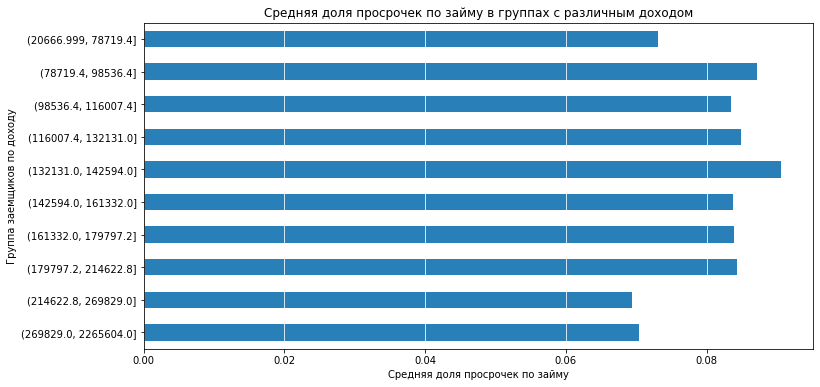

In [54]:
data.groupby('income_cut')['debt'].agg(['mean']).plot(kind='barh', legend=False, color='#2980b9').invert_yaxis()
plt.title('Средняя доля просрочек по займу в группах с различным доходом')
plt.ylabel('Группа заемщиков по доходу')
plt.xlabel('Средняя доля просрочек по займу')
plt.grid(True, axis='x', color='w')
plt.show()

In [55]:
lower_class = data.query('income_cut == income_cut[0]')
lower_class.groupby('loan_category')['debt'].agg(['mean', 'count'])

,mean,count
loan_category,,
автомобиль,0.077605,451
недвижимость,0.065559,1083
образование,0.086387,382
свадьба,0.043668,229


Заемщики с самым низким уровнем дохода (20666.999, 78719.4] чаще всего берут кредит на недвижимость и уровень просрочки довольно низок 6.6%. Скорее всего, кредит в данной категории берется на ремонт или улучшение жилищных условий. Реже всего задолженности допускают, когда берут кредит на свадьбу (4.3%). А чаще всего - когда берут на образование (8.6%).

In [56]:
middle_class = data.query('income_cut == income_cut[4]')
middle_class.groupby('loan_category')['debt'].agg(['mean', 'count'])

,mean,count
loan_category,,
автомобиль,0.107969,389
недвижимость,0.073314,1023
образование,0.088384,396
свадьба,0.081448,221


Заемщики с средним уровнем дохода (132131.0, 142594.0] также берут чаще всего кредит на недвижимость и реже всего допускают по нему просрочки (7.3%). Самый рискованный тип займа - автокредит (10.7% задолженности). 

In [57]:
upper_class = data.query('income_cut == income_cut[8]')
upper_class.groupby('loan_category')['debt'].agg(['mean', 'count'])

,mean,count
loan_category,,
автомобиль,0.089372,414
недвижимость,0.072544,1089
образование,0.121588,403
свадьба,0.092050,239


Состоятельные клиенты также чаще всего берут и возвращают кредиты на недвижимость, однако в данном случае она скорее всего играет роль объекта для инвестиций, нежели основного жилья. Наиболее рискованный тип кредита в данной группе - на образование (в 12.1% просрочка).

**Вывод:** Разбив децилями выборку на 10 частей, мы продемонстрировали, что зависимость между доходом и возвратом кредита действительно есть, однако она нелинейная. Любопытно, что заемщики с наименьшими доходами относительно выборки (до 78719.4 включительно) имеют очень низкую вероятность просрочки (7.3%). Можно предположить, что такие клиенты берут кредит только в случае острой необходимости и ответственно подходят к обслуживанию долга. Далее можно наблюдать тенденцию к повышению вероятности просрочки с ростом дохода до диапазона (132131-142594], где риск несвоевременной выплаты задолженности достигает пика 9%. После этого пика, риск начинает уменьшаться и заметно падает в диапазоне (214622.8-2265604] - до 6.9% - 7%. 

### 3.4 Как разные цели кредита влияют на его возврат в срок? <a name="subparagraph3_4"></a>

In [58]:
data.groupby('loan_category')['debt'].agg(['mean','count'])

,mean,count
loan_category,,
автомобиль,0.093590,4306
недвижимость,0.072340,10810
образование,0.092200,4013
свадьба,0.080034,2324


**Вывод:** Кредиты взятые на разные цели возвращают по-разному. Кредит под недвижимость - самый безопасный для выдачи тип кредита. Заемщики относятся к нему наиболее ответственно и уровень просрочки наименьший (7.2%). Несколько более рискованный кредит на свадьбу - просрочка в 8%, тем не менее это умеренный уровень. В данном случае, благоприятным фактором становится то, что обслуживать кредит, скорее всего, будут 2 человека (муж и жена), несмотря на то, что заемщик один. Самые рискованные кредиты - на образование (9.2%) и автокредит (9.3%). Образование не всегда гарантирует достойную оплату труда, при этом также нет гарантий, что заемщик успешно получит это образование. Автомобиль - это дорогой в обслуживании актив и, к тому же, подверженный значительному износу. Заемщик не всегда адекватно может оценить будущие расходы, связанные с обслуживанием и налогообложением приобретенного автомобиля, что приводит к просрочкам и задолженности.

[Вернуться к оглавлению](#introduction)

## 4. Общий вывод <a name="paragraph4"></a>

* Гипотеза о зависимости между наличием детей у заемщика и возвратом кредита подтвердилась. Клиенты без детей реже становятся должниками (в 7.5% случаев) по сравнению с теми, у кого есть дети (9.2%). Также с увеличением количества детей растет риск несвоевременного погашения задолженности.


* Гипотеза о зависимости между семейным положением и возвратом кредита в срок подтвердилась. Люди, находящиеся в официальном браке, либо находившиеся в нем ранее, реже становятся должниками - в 7.4% случаев. Для людей, которые никогда не находились в официальном браке, этот риск составляет 9.3%.


* Гипотеза о зависимости между доходом и возвратом кредита подтвердилась - эта связь нелинейная. Заемщики с самым низким уровнем дохода имеют относительно низкий уровень просрочки. Заемщики со средними доходами имеют наивысший риск просрочки. Состоятельные заемщики демонстрируют риск, чуть ниже группы с самыми низкими доходами.


* Гипотеза о зависимости между целью кредита и его своевременным возвратом подтвердилась. Наиболее безопасными можно условно считать займы, связанные с недвижимостью (7.2%). Чуть более рискованный кредит на свадьбу (8%). Самые рискованные кредиты - на образование (9.2%) и автомобиль (9.3%). По ним просрочки допускают чаще всего.

[Вернуться к оглавлению](#introduction)